In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

****************************************
RUNNING IN DEVELOP
****************************************


In [2]:
cs = ["slide_21","slide_22","slide_26","slide_27","slide_31","slide_32","slide_36","slide_23","slide_28","slide_33","slide_37"]
[#new anti correlated best
#55,56,59,63,83,94,95,100,121,125,131.2,            11
#strong signal medium anti correlation:
#43,80,98,102,103,Nenad                             5
]
lb = ["P055","P056","P059","P063","P083","P094","P095","P100","P121","P125","P131.2","P043","P080","P098","P102","P103","Nenad"]

spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=cs)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
a = spots_dj
spots_dj = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = lb)
#spots_dj = spots_dj.filter(circle_quality__gte = 0.4)


In [3]:
reload(a2)

<module 'analysis2' from '/home/janekg89/Develop/Pycharm_Projects/flutype_analyse_wepdata/analysis2.pyc'>

In [4]:
frames = []
for cq in np.linspace(0.1,0.5,5):
    spots_this = spots_dj.filter(circle_quality__gte = cq)
    data = a2.Data(spots_dj=spots_this)
    data = data.sample_on_collection(60).clean()
    #ana = a2.Analysis(data, train_test = data.train_test_combinations[:25])
    ana = a2.Analysis(data)
    ana.calculate_all()
    frames.append(ana.all_score())


*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****Confusion Matrix*****
*****Score*****
*****Score by Collection*****
*****Majority Score by Collection*****
*****Predictions Count by Collection*****
*****Confusion Matrix by Collection*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****Confusion Matrix*****
*****Score*****
*****Score by Collection*****
*****Majority Score by Collection*****
*****Predictions Count by Collection*****
*****Confusion Matrix by Collection*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****Confusion Matrix*****
*****Score*****
*****Score by Collection*****
*****Majority Score by Collection*****
*****Predictions Count by Collection*****
*****Confusion Matrix by Collection*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****Confusion Matrix*****
*****Score*****
*****Score by Collection*****
*****Majority Score by Collection*****
*****Predictions Count by Collection*****
*****Conf

In [5]:
result = pd.concat(frames , keys =np.linspace(0.1,0.5,5))
result.index.names = ["Circle Quality",'Classifier Name', 'Analyte Batch']


In [6]:
import matplotlib.cm as cm



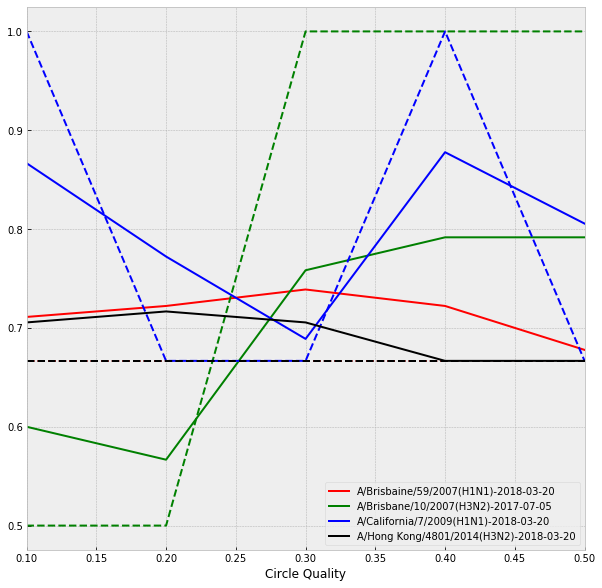

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
#mpl.style.use('seaborn')
mpl.style.use('bmh')
colors = cm.rainbow(np.linspace(0, 1, 4))
colors = ["r","g","b","k"]
for (n, d),c in zip(result.reset_index().groupby(["Analyte Batch"]),colors):
    #if n == "A/Brisbaine/59/2007(H1N1)-2018-03-20":
        d.plot(x="Circle Quality",y="Score", ax=ax,label=n, color=c)
        d.plot(x="Circle Quality",y="Majority Score", ax=ax, style="--",color=c , legend=None)
plt.show()


In [18]:
ana.result["Score by Collection"].apply(pd.Series)

,slide_21,slide_22,slide_23,slide_26,slide_27,slide_28,slide_31,slide_32,slide_33,slide_36,slide_37
0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN
2,1.0,NaN,NaN,NaN,NaN,0.033333,1.0,NaN,NaN,1.0,NaN
3,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
4,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN
5,1.0,NaN,NaN,NaN,NaN,0.033333,NaN,1.0,NaN,1.0,NaN
6,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.416667,1.0,NaN
7,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.416667,1.0,NaN
8,1.0,NaN,NaN,NaN,NaN,0.033333,NaN,NaN,0.416667,1.0,NaN
9,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
